In [1]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In this workspace, you'll make use of this data set describing various car attributes, such as fuel efficiency. The cars in this dataset represent about 3900 sedans tested by the EPA from 2013 to 2018. This dataset is a trimmed-down version of the data found [here](https://catalog.data.gov/dataset/fuel-economy-data).

In [3]:
cars_fuel = pd.read_csv("fuel-econ.csv")
cars_fuel.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


### **TO DO 1**: 
Let's look at the relationship between fuel mileage ratings for city vs. highway driving, as stored in the 'city' and 'highway' variables (in miles per gallon, or mpg). **Use a _scatter plot_ to depict the data.**
1. What is the general relationship between these variables? positive relation
2. Are there any points that appear unusual against these trends? NO

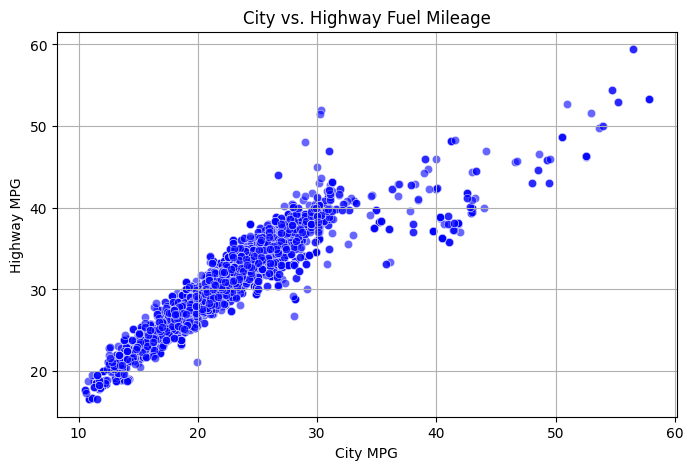

In [ ]:
plt.figure(figsize=(8, 5))
sb.scatterplot(x='city', y='highway', data=cars_fuel, color='blue', alpha=0.6)
plt.title('City vs. Highway Fuel Mileage')
plt.xlabel('City MPG')
plt.ylabel('Highway MPG')
plt.grid(True)
plt.show()

 - The scatter plot shows a positive relationship between city and highway fuel mileage, indicating that cars with higher city mileage generally also have higher highway mileage.
After visual inspection, there are no unusual points that deviate significantly from the trend, suggesting consistency in the data

### **TO DO 2**: 
Let's look at the relationship between two other numeric variables. How does the engine size relate to a car's CO2 footprint? The 'displ' variable has the former (in liters), while the 'co2' variable has the latter (in grams per mile). **Use a heat map to depict the data.** How strong is this trend?

العلاقه هنا تعتبر strong positive correlation بمعنى إنه كل ما زاد حجم المحرك (displ) زادت انبعاثات الكربون (co2) بشكل واضح، وده بيتماشى مع المنطق العلمي للسيارات.



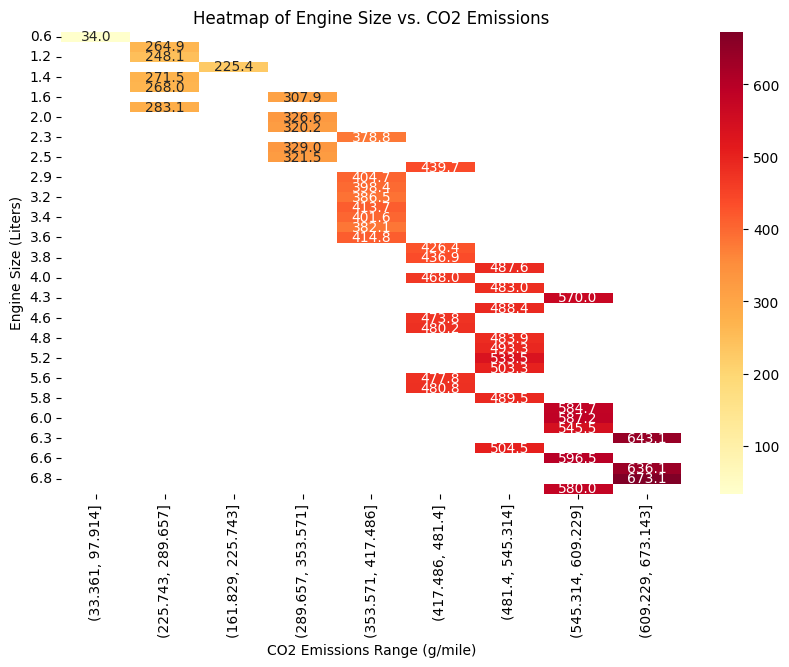

In [ ]:

heatmap_data = cars_fuel[['displ', 'co2']].groupby(['displ']).mean().reset_index()
heatmap_data['co2_range'] = pd.cut(heatmap_data['co2'], bins=10)
heatmap_pivot = heatmap_data.pivot(index="displ", columns="co2_range", values="co2")
plt.figure(figsize=(10, 6))
sb.heatmap(heatmap_pivot, cmap='YlOrRd', annot=True, fmt='.1f')
plt.title("Heatmap of Engine Size vs. CO2 Emissions")
plt.xlabel("CO2 Emissions Range (g/mile)")
plt.ylabel("Engine Size (Liters)")
plt.show()


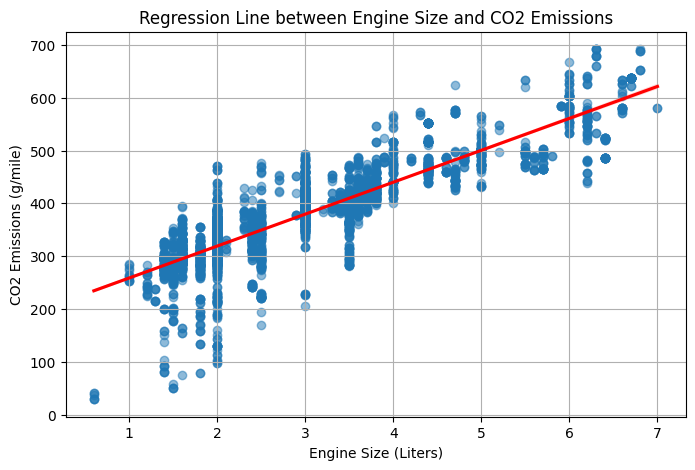

In [13]:
plt.figure(figsize=(8, 5))
sb.regplot(x='displ', y='co2', data=cars_fuel, scatter_kws={'alpha':0.5}, line_kws={"color": "red"})
plt.title('Regression Line between Engine Size and CO2 Emissions')
plt.xlabel('Engine Size (Liters)')
plt.ylabel('CO2 Emissions (g/mile)')
plt.grid(True)
plt.show()
